In [ ]:
import numpy as np

In [211]:
np.log(1J), np.sqrt(1J)

(1.5707963267948966j, (0.70710678118654757+0.70710678118654746j))

In [209]:
class Markoff(object):
    
    def __init__(self, mn = (3,np.array([1,0]))):
        self.n, self.v = mn
    
    #this is cheating as it breaks the symetry 
    #between + and - 
    #but the subsequent code looks better
    
    def __mul__(self, other):
        return Mark((self.n*other.n, self.v + other.v))
    
    def __sub__(self, other):
        return Mark((self.n - other.n, self.v))
    
    def __abs__(self):
        return abs(self.n)
    
    def m2v(self):
        #thisis a dumb name for a function
        length = acosh(self.n)
        #not elegant I want to check if  .real exists
        if not isinstance(length, np.float64):
            length = abs(length.real)
   
        return self.v/length
        
    def __str__(self):
        return str(self.n)
    
    def __repr__(self):
        return self.n
        

In [187]:
def acosh(u):
    #this will take complex numbers
    return np.log( .5*(u + np.sqrt(u**2 - 4)))
    

In [185]:
acosh(3*3 - 2)/2, acosh(1J)

(0.96242365011920694, 0.48121182505960347)

(0.361190523447-0.0283590992241j) (3-6.59194920871e-16j)
0.0144160446663 0.962423650119


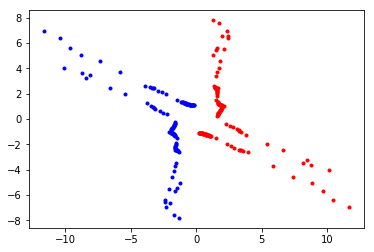

In [317]:
# these two are global to tree()
max_depth = 1000
nums = []
# but who cares?

def tree(mt, dd):
    dd +=1
    x,y,z = mt
    nums.append(z)
    if abs(z) > max_depth or dd > 5:
        return
    tree((z,y,y*z - x), dd)
    tree((x,z,x*z - y), dd)


z1, z2 = calc_z(a,b) 
print z1,z2
print acosh(z1).real,acosh(z2).real
x = Markoff((a, np.array([1,0]) ))
y = Markoff((z1, np.array([0,1]) ))
z = Markoff((b, np.array([1,1]) ))

tree((x,y,z), dd=0)

y = Markoff((z2, np.array([0,-1]) ))
z = Markoff((b, np.array([1,-1]) ))

tree((x,y,z), dd=0)

TT = [ n.m2v() for n in nums]
TT = [v for v in TT if np.linalg.norm(v) < 20]
XS, YS = zip(*TT)
plt.plot(XS,YS,'r.')
TT = [ -v for v in TT]
XS, YS = zip(*TT)
plt.plot(XS,YS,'b.')


In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
def calc_z(x,y):
    xy = x*y
    #np.sqrt works for cplx
    delta = np.sqrt((xy)**2 - 4*(x**2 + y**2))
    return .5*(xy - delta ), .5*(xy + delta )

In [170]:
calc_z(3,4)

(2.6833752096446002, 9.3166247903553998)

(0.70710678118654757+0.70710678118654746j)

In [311]:
from collections import deque
#because deque has a rotate=roll method

def find_short(x):
    mm = max([acosh(t).real for t in x])
    print x
    for i in range(3):
        y = x[0]*x[1] - x[2]
        if abs(acosh(y).real) < mm:
            x[2] = y
            return find_short(x)
        x.rotate(1)
    else:
        return x
    
a = 3 + 0J
z1, z2 = calc_z(a,b)  
        
a,b,c = find_short(deque([a,b,z2]))

deque([(3+0j), (1.3999999999999995-1.2j), (2.8059712788546918-4.7746252615359346j)])
deque([(3+0j), (1.3999999999999995-1.2j), (1.3940287211453066+1.1746252615359349j)])
deque([(1.3999999999999995-1.2j), (1.3940287211453066+1.1746252615359349j), (0.36119052344655023-0.028359099224059658j)])


In [263]:
def L(pt):
    x,y,z = pt
    return (z,y,y*z - x)

def R(pt):
    x,y,z = pt
    return (x,z,x*z - y)

def MM(pt):
    F = [L,R,L,R]
    for f in F:
        pt = f(pt)
    return pt[2]

ts = 1J*np.linspace(0,2*np.pi,5)[:-1]
diffs = .05*np.exp(ts)


In [299]:
a,b = 3.,3.

for k in range(20):
    vv = []
    for dz in diffs:
        bb = b + dz
        z1, z2 = calc_z(a, bb)
        res  = MM((a, bb, z1) )
        vv.append( ( abs(acosh(res).real), bb) )
    b = min(vv)[1]
    

In [307]:
b

(1.3999999999999995-1.2j)

In [301]:
vv

[(0.19213856479571884, (1.5999999999999994-1.3999999999999999j)),
 (1.0887562838497102, (1.3999999999999995-1.2j)),
 (0.40986102064596242, (1.1999999999999995-1.3999999999999999j)),
 (0.24778282754077791, (1.3999999999999995-1.5999999999999999j))]

In [306]:
b = vv[1][1]